In [1]:
import os
import cv2
import numpy as np
import tqdm as tqdm

In [5]:
from tqdm import tqdm
REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg"in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                        
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    except Exception as e:
                        pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  0%|                                                                                | 5/12501 [00:00<04:24, 47.18it/s]

PetImages/Cat


  1%|▍                                                                             | 69/12501 [00:00<00:18, 671.30it/s]

PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:18<00:00, 694.19it/s]


Cats:  12476
Dogs:  12470


In [7]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [8]:
print(len(training_data))

24946


In [9]:
print(training_data[0])

[array([[131, 135, 137, ...,  93, 112, 115],
       [126, 135, 140, ...,  93,  98, 110],
       [117, 141, 141, ..., 127, 107, 120],
       ...,
       [ 45,  42,  44, ..., 132, 114, 126],
       [ 44,  44,  57, ..., 149, 171, 114],
       [ 44,  56,  62, ..., 132, 155, 149]], dtype=uint8)
 array([0., 1.])]


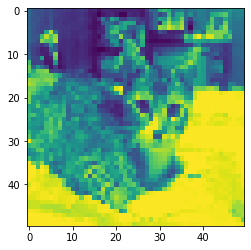

In [10]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0])
plt.show()

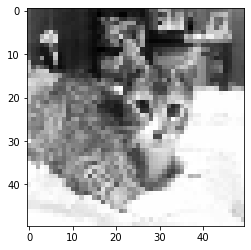

In [11]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0], cmap = "gray")
plt.show()